In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# read moves.csv file
moves_data = pd.read_csv('moves.csv', index_col=0)
moves_df = pd.DataFrame(moves_data)
display(moves_df)

,No of Moves,Probability
0,898,0.000001
1,900,0.000001
2,901,0.000003
3,902,0.000004
4,903,0.000003
...,...,...
76,975,0.000003
77,976,0.000002
78,977,0.000001
79,978,0.000002


In [19]:
# display summary statistics of data
display(moves_data[["No of Moves"]].describe())

,No of Moves
count,81.000000
mean,939.024691
std,23.614072
min,898.000000
25%,919.000000
50%,939.000000
75%,959.000000
max,982.000000


In [20]:
moves_df["No of Moves"].mean()

939.0246913580247

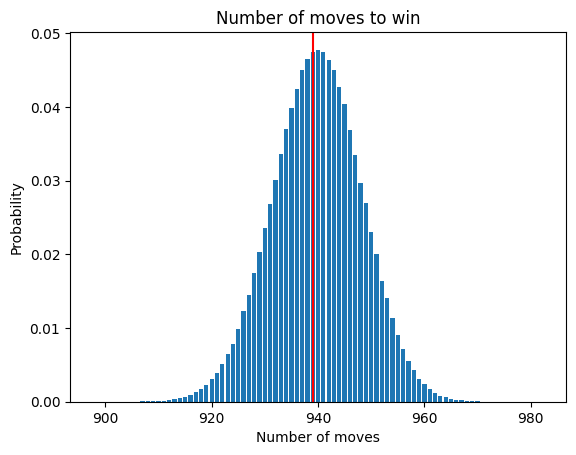

In [21]:
# plot bar chart for expected move
plt.bar(moves_df['No of Moves'], moves_df['Probability'])
plt.title('Number of moves to win')
plt.xlabel('Number of moves')
plt.ylabel('Probability')

plt.axvline(x = moves_df["No of Moves"].mean(), color = 'r', label = 'mean')


In [22]:
# read absorbing_states.csv file
absorbing_state_data = pd.read_csv('absorbing_probabilities_simulation.csv', index_col=0)
absorbing_state_df = pd.DataFrame(absorbing_state_data)
display(absorbing_state_df)

,Absorbing State,Absorbing Probability,Sum
0,"[2, 4, 16, 2048]",0.291240,2070
1,"[2, 2, 4, 16, 2048]",0.141335,2072
2,"[2, 2, 8, 8, 2048]",0.347872,2068
3,"[4, 4, 4, 16, 2048]",0.002647,2076
4,"[4, 4, 16, 2048]",0.032211,2072
5,"[2, 4, 8, 8, 2048]",0.077279,2070
6,"[2, 4, 4, 16, 2048]",0.039499,2074
7,"[2, 4, 4, 8, 2048]",0.035075,2066
8,"[2, 8, 16, 2048]",0.012390,2074
9,"[4, 4, 8, 8, 2048]",0.004248,2072


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

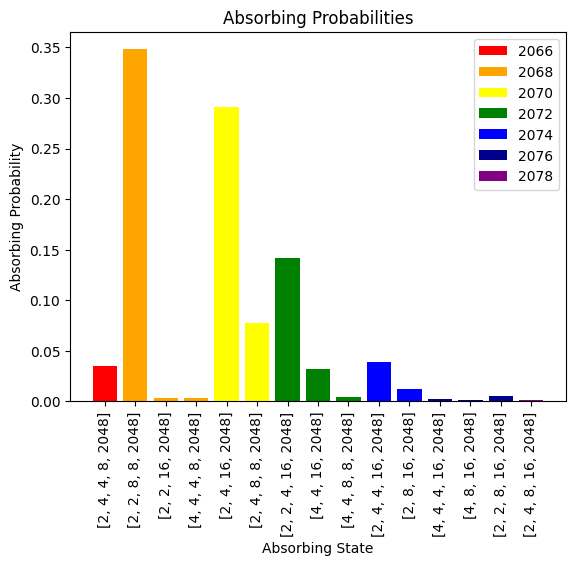

In [26]:
# plot absorbing probability (states)
sub_absorbing_state_df = absorbing_state_df[absorbing_state_df['Absorbing Probability'] >= 1e-4]
mapping = {2066: "red", 2068: "orange", 2070: "yellow", 2072: "green", 2074: "blue", 2076: "darkblue", 2078: "purple"}

fig, ax = plt.subplots()

for special_value in mapping:
    selected_df = sub_absorbing_state_df[sub_absorbing_state_df['Sum'] == special_value] 
    plt.bar(selected_df['Absorbing State'], selected_df['Absorbing Probability'], color=mapping[special_value], label=special_value)
plt.title('Absorbing Probabilities')
plt.xlabel('Absorbing State')
plt.ylabel('Absorbing Probability')
plt.legend()

plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')


In [24]:
# sum 
sorted(sub_absorbing_state_df['Sum'].unique())

[2066, 2068, 2070, 2072, 2074, 2076, 2078]

Text(0, 0.5, 'Absorbing Probability')

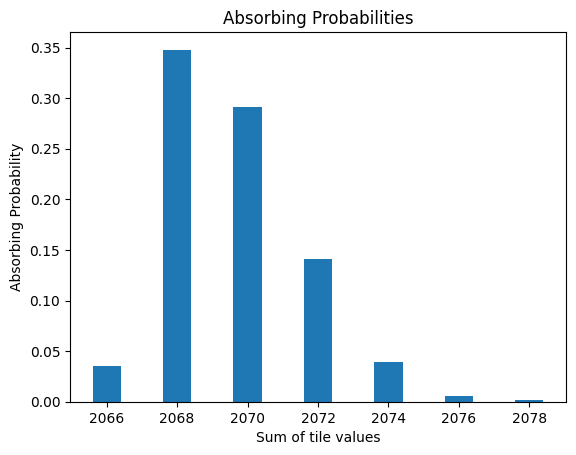

In [25]:
# plot absorbing probability (sum)

fig, ax = plt.subplots()
plt.bar(sub_absorbing_state_df['Sum'], sub_absorbing_state_df['Absorbing Probability'])
plt.title('Absorbing Probabilities')
plt.xlabel('Sum of tile values')
plt.ylabel('Absorbing Probability')
